In [13]:
from __future__ import division

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
import pandas as pd
import numpy as np

dfQ = pd.read_csv('q_df_100_full.csv', index_col=0, parse_dates=True, na_values = ['nan'])


dfQ_column_list = ['Date', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25', 'col26', 'col27', 'col28', 'col29', 'col30', 'col31', 'col32', 'col33', 'col34', 'col35', 'col36', 'col37', 'col38', 'col39', 'Q']

dfQ = dfQ[dfQ_column_list]

print(dfQ.shape)
# display(dfQ.head())
display(dfQ[dfQ['Date'] == '0']['Date'].describe())
# display(dfQ['Date'] == 0)

(47391, 41)


count     18363
unique        1
top           0
freq      18363
Name: Date, dtype: object

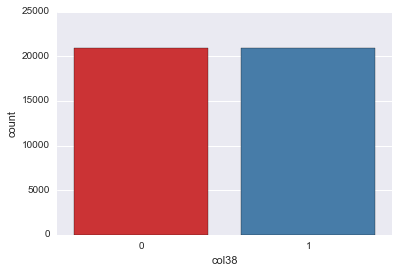

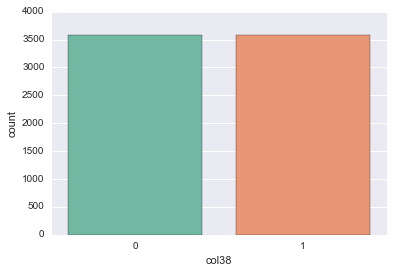

In [8]:
plt.figure()
sns.countplot(dfQ_train['col38'], palette='Set1')
plt.figure()
sns.countplot(dfQ_test['col38'], palette='Set2')

In [9]:
def transfer_action(x):
    if x == 'Buy':
        return 1
    elif x == 'Sell':
        return 2
    elif x == 'Hold':
        return 0
    else:
        raise ValueError("Wrong action!")

dfQ_train['col39'] = dfQ_train['col39'].apply(transfer_action)
dfQ_test['col39'] = dfQ_test['col39'].apply(transfer_action)

display(dfQ_train.head())
display(dfQ_test.head())



,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col31,col32,col33,col34,col35,col36,col37,col38,col39,Q
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,2.0,1.0,1,0,0.047355
1,5.0,3.0,3.0,3.0,2.0,3.0,3.0,4.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0.018384
2,3.0,1.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1,1,0.023264
3,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,2,0.005428
4,1.0,3.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1,0,-0.016629


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col31,col32,col33,col34,col35,col36,col37,col38,col39,Q
0,3.0,3.0,2.0,3.0,4.0,5.0,5.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0.000591
1,2.0,3.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0.005131
2,5.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,2,0.027343
3,2.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,...,3.0,2.0,2.0,1.0,1.0,1.0,1.0,0,0,0.000681
4,3.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0,2.0,4.0,...,1.0,1.0,1.0,1.0,1.0,3.0,3.0,1,1,0.001891


count    41772.000000
mean         0.017096
std          0.025546
min         -0.224785
25%          0.003919
50%          0.012671
75%          0.025834
max          0.396929
Name: Q, dtype: float64
count    7152.000000
mean        0.011735
std         0.013489
min        -0.107199
25%         0.004257
50%         0.010203
75%         0.018389
max         0.100120
Name: Q, dtype: float64
                  0
count  38855.000000
mean       0.013970
std        0.015944
min       -0.028938
25%        0.003845
50%        0.011940
75%        0.023169
max        0.058663
                 0
count  6830.000000
mean      0.011117
std       0.010428
min      -0.016869
25%       0.004298
50%       0.009954
75%       0.017570
max       0.039502


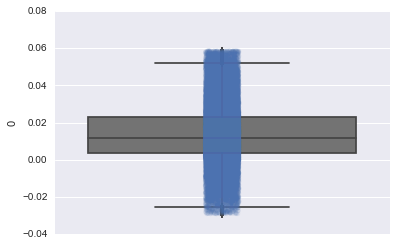

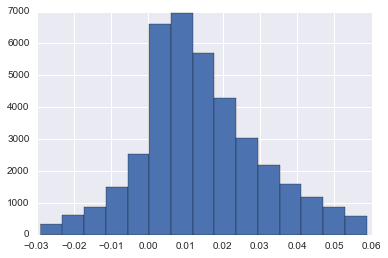

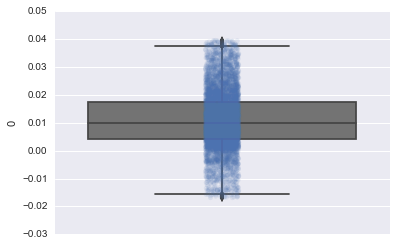

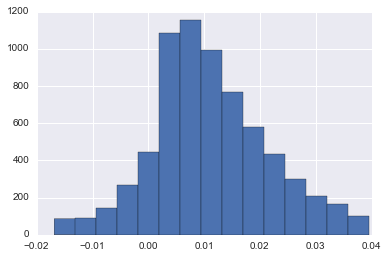

In [12]:
import seaborn as sns

def take_out_outliers(arr):
    q75, q25 = np.percentile(arr, [75 ,25])
    iqr = q75 - q25
    
    thres_bottom = q25 - 1.5 * iqr
    thres_top = q75 + 1.5 * iqr
    
    result = [u for u in arr if u > thres_bottom and u < thres_top]
    
    return result

print(dfQ_train['Q'].describe())
print(dfQ_test['Q'].describe())

dfQ_train_no_outliers = pd.DataFrame(take_out_outliers(dfQ_train['Q']))
dfQ_test_no_outliers = pd.DataFrame(take_out_outliers(dfQ_test['Q']))
print(dfQ_train_no_outliers.describe())
print(dfQ_test_no_outliers.describe())

plt.figure()
ax_train_Q = sns.boxplot(y=0, data=dfQ_train_no_outliers, orient='v', color='.45')
ax_train_Q = sns.stripplot(y=0, data=dfQ_train_no_outliers, jitter=0.05, alpha=0.1)

plt.figure()
plt.hist(dfQ_train_no_outliers, bins=15)

plt.figure()
ax_test_Q = sns.boxplot(y=0, data=dfQ_test_no_outliers, orient='v', color='.45')
ax_test_Q = sns.stripplot(y=0, data=dfQ_test_no_outliers, jitter=0.05, alpha=0.1)

plt.figure()
plt.hist(dfQ_test_no_outliers, bins=15)

plt.show()
# np.sign(dfQ) * np.log(np.abs(dfQ) + 1).boxplot(column='Q')

In [14]:
dfQ_train_X = dfQ_train.ix[:, :-1]
dfQ_train_y = dfQ_train.ix[:, -1]

dfQ_train_features = dfQ_train.ix[:, :-2]

dfQ_test_X = dfQ_test.ix[:, :-1]
dfQ_test_y = dfQ_test.ix[:, -1]
dfQ_test_features = dfQ_test.ix[:, :-2]

# dfQ_label = dfQ['col39']

In [15]:
from sklearn import cross_validation
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = cross_validation.train_test_split(dfQ_train_X, dfQ_train_y, test_size=0.3, random_state=0)

# reduced_X = pca_X.transform(dfQ_X)
# X_train, X_test, y_train, y_test = cross_validation.train_test_split(reduced_X, dfQ_y, test_size=0.3, random_state=0)


def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_squared_error(y_true, y_predict)
    return error

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(performance_metric, greater_is_better=False)

    # Make the GridSearchCV object
    reg = GridSearchCV(regressor, parameters, scoring = scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_

def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = plt.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()
    
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 40)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    plt.figure(figsize=(7, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    plt.plot(max_depth, train_err, lw=2, label = 'Training Error')
    plt.legend()
    plt.xlabel('Maximum Depth')
    plt.ylabel('Total Error')
    plt.show()

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


/Users/calvinku/anaconda/envs/udacity/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


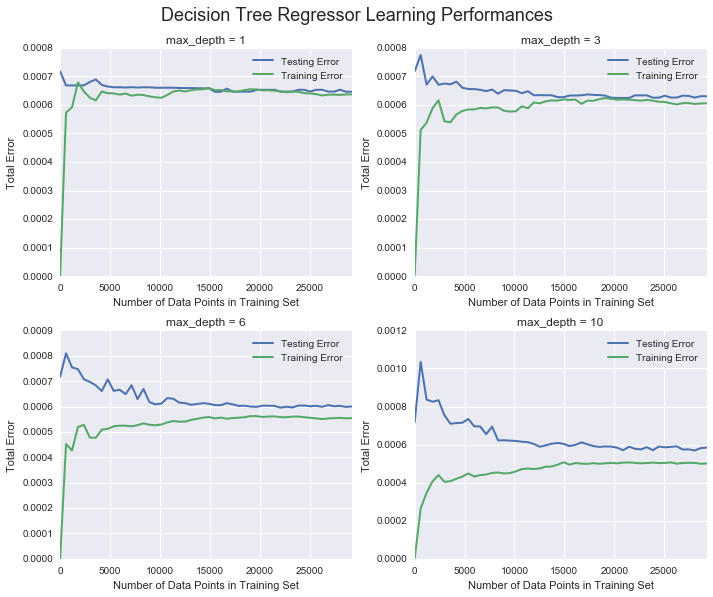

In [16]:
learning_curves(X_train, y_train, X_test, y_test)

Creating a model complexity graph. . . 


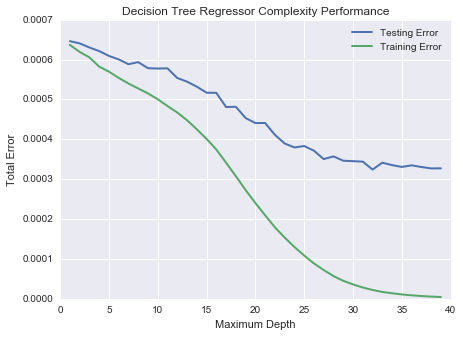

In [17]:
model_complexity(X_train, y_train, X_test, y_test)

In [25]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import grid_search

# Go with CV method (full data training)
X_train = dfQ_train.ix[:, :-1]
y_train = dfQ_train.ix[:, -1]

X_test = dfQ_test.ix[:, :-1]
y_test = dfQ_test.ix[:, -1]

# print(X_train.head())
# print(y_train.head())

# No-Ohe (CV9):
# RF: 256: 0.666679958023
# AdaDT 50:0.6686

# No-Ohe (CV9 Full):
# AdaDT (50, 20), (50, 30):0.64
# RF: 256: 0.666679958023



# reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20), n_estimators=50, random_state=0)
# reg = KNeighborsRegressor(n_neighbors=2)
# reg = DecisionTreeRegressor(max_depth=25) 

reg = RandomForestRegressor()
# rf_parameters = {'n_estimators':[256], 'criterion':['mse'], 'bootstrap':[True]}

# reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=40), random_state=0)
# ada_parameters = {'n_estimators':[50]}
# reg_gs = grid_search.GridSearchCV(reg, ada_parameters, cv=9)
# reg_gs.fit(X_train, y_train)

# reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=20, random_state=0, loss='ls')

reg.fit(X_train, y_train)

# single_X = np.array(X_test.ix[0])
# single_X = single_X.reshape(1, -1)
# print(single_X)
# y_pred = reg.predict(single_X)
# print(y_pred[0])

y_pred = reg_gs.predict(X_test)

# y_pred = reg.predict(X_test)

r2 = r2_score(list(y_test), y_pred)
print(r2)

# print(reg.feature_importances_)
# print(reg_gs.feature_importances_)

# df = y_test.to_frame()
# df.reset_index(inplace=True)
# df['Index'] = df.index
# df.plot(kind='scatter', x='Index', y='Q')

# df2 = pd.DataFrame(y_pred)
# df2.columns = ['Q']
# # print(df2)
# df2['Index'] = df2.index
# df2.plot(kind='scatter', x='Index', y='Q')

# df_log = df
# df_log['logQ'] = np.sign(df['Q']) * np.log(np.abs(df['Q']) + 1)
# print(df_log)
# df_log.plot(kind='scatter', x='Index', y='logQ')
# print(df_log['logQ'].describe())

-7.35678582201


In [21]:
print(reg_gs.best_score_)

0.720535228371


In [26]:
from copy import deepcopy

X_test['Q'] = y_test
test_data = deepcopy(X_test)
test_data.reset_index(inplace=True)
del test_data['index']

pred_data = deepcopy(test_data)
pred_data.loc[:, 'Q'] = y_pred

display(test_data.head())
display(pred_data.head())

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col31,col32,col33,col34,col35,col36,col37,col38,col39,Q
0,3.0,3.0,2.0,3.0,4.0,5.0,5.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0.000591
1,2.0,3.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0.005131
2,5.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,2,0.027343
3,2.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,...,3.0,2.0,2.0,1.0,1.0,1.0,1.0,0,0,0.000681
4,3.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0,2.0,4.0,...,1.0,1.0,1.0,1.0,1.0,3.0,3.0,1,1,0.001891


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col31,col32,col33,col34,col35,col36,col37,col38,col39,Q
0,3.0,3.0,2.0,3.0,4.0,5.0,5.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0.011456
1,2.0,3.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0.010347
2,5.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,2,0.018503
3,2.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,...,3.0,2.0,2.0,1.0,1.0,1.0,1.0,0,0,0.033125
4,3.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0,2.0,4.0,...,1.0,1.0,1.0,1.0,1.0,3.0,3.0,1,1,0.171869


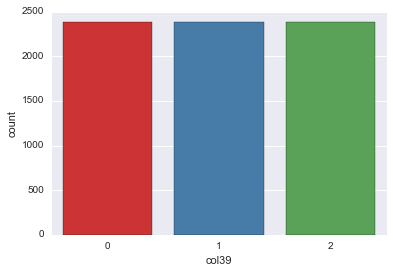

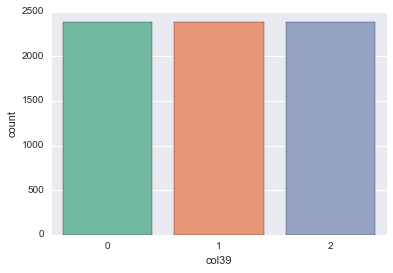

In [29]:
plt.figure()
sns.countplot(test_data['col39'], palette='Set1')
plt.figure()
sns.countplot(pred_data['col39'], palette='Set2')

In [30]:
from collections import defaultdict

display(test_data.head())
print(test_data.shape)
choice_dict_test = defaultdict(list)
choice_dict_pred = defaultdict(list)

for index, row in test_data.iterrows():
    choice_dict_test[tuple(row[:-2])].append((index, row[-2], row[-1]))

for index, row in pred_data.iterrows():
    choice_dict_pred[tuple(row[:-2])].append((index, row[-2], row[-1]))

    
# print(len(choice_dict))

action_list_test = []
action_list_pred = []

for key, value in choice_dict_test.iteritems():
    index, action, q = max(choice_dict_test[key], key=lambda x: x[2])
    action_list_test.append(action)

for key, value in choice_dict_pred.iteritems():
    index, action, q = max(choice_dict_pred[key], key=lambda x: x[2])
    action_list_pred.append(action)

print(action_list_test[:10])
print(action_list_pred[:10])

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col31,col32,col33,col34,col35,col36,col37,col38,col39,Q
0,3.0,3.0,2.0,3.0,4.0,5.0,5.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0.000591
1,2.0,3.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,1,0.005131
2,5.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,2,0.027343
3,2.0,3.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,...,3.0,2.0,2.0,1.0,1.0,1.0,1.0,0,0,0.000681
4,3.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0,2.0,4.0,...,1.0,1.0,1.0,1.0,1.0,3.0,3.0,1,1,0.001891


(7152, 40)
[0.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 0.0, 1.0, 0.0]
[1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0]


        Err  Index
0  0.010865      0
1  0.005216      1
2 -0.008840      2
3  0.032444      3
4  0.169978      4


count    7152.000000
mean        0.014508
std         0.036194
min        -0.089189
25%        -0.004122
50%         0.005329
75%         0.018604
max         0.264476
Name: Err, dtype: float64

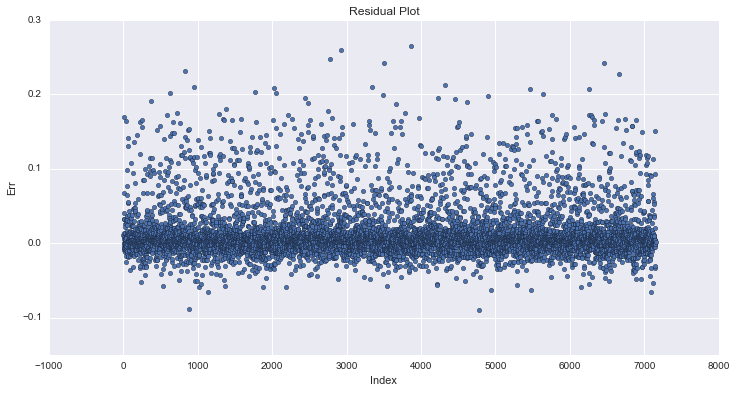

In [31]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

dfErr = pd.DataFrame(y_pred - y_test)
dfErr['Index'] = dfErr.index
dfErr.columns = ['Err', 'Index']

print(dfErr.head())
dfErr.plot.scatter(x='Index', y='Err', title='Residual Plot', figsize=(12, 6))
display(dfErr['Err'].describe())

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(action_list_test, action_list_pred)

0.36996644295302011